## Part 1: Define Goal, why it matters, id target variable, state initial hypotheses
- Executives/Sales initial question: "how many customers are churning?", "why are customers churning?", "How much revenue does that cost?", "How much investment is required to acquire equivalent new customers?", "How else could we spend this money if we better retained customers?"
- Opportunity cost: if we retain customers, we eliminate both revenue loss, and additional capital outlay to acquire replacement customers
- End State: 
    - understand: 
        - TELCO churn v. Industry average churn (source? >> BLS, quarterly reports, industry journals and publications), 
        - profile of most common churning customer(age, gender, plan), 
        - identify most likely reason for churn (price, demographic), 
- DS questions: 
    - What are the drivers of customer churn?
        - high price for certain contract types (higher than competitors)
    - Who is churning?
        - old? young? married? single? kids? no kids?
    - Why does churn matter? 
        - High cost of employee acquisition and training (50-200%)
        - Productivity: drop in overall productivity (less personnel, drop in morale for remaining employees)
        - Snowball effect in attrition
        - HR retention bonus for low attrition?
    - What opportunnities exist?
        - effective pricing through market segmentation
            - discounts to pay electronically
            - discounts on bundled internet and phone plans
            - discounts on bundled phone lines
- Target variable:
    - churn
- What are some interesting variables?
    - churned customer plan (monthly, month to month, bundle) vis-a-vis price
    - customer demographic:
        - senior or not
        - gender
        - dependants or not
        - married or not
        - payment type
    - age/gender/race >> culture issue?
    - time since last promotion/raise
    - income, then...
    - department, by income
- What would a minimally viable product look like?
    - deliverable: can be:
        - email with recs >> the simplest 
        - sldieshow
        - ML model we deliver to engineering team to deploy live
    - what target rate are we hitting with churn?
    - whats the biggest story i.e. variable most correlated with churn?
        
     ** Source your data: 

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
telco_data = pd.read_csv("Fred Lindsey - jemison_spreadsheet_exercises - Table1_CustDetails.csv")
telco_data
#telco_data.to_csv

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No,13.5
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes,22.0
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No,1.8
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No,68.2


In [3]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


In [4]:
telco_data.head(2).T

,0,1
customer_id,0002-ORFBO,0003-MKNFE
gender,Female,Male
is_senior_citizen,0,0
partner,Yes,No
dependents,Yes,No
phone_service,1,2
internet_service,1,1
contract_type,1,0
payment_type,Mailed check,Mailed check
monthly_charges,65.6,59.9


In [5]:
telco_data.size

91637

## Answering the basic questions:

### 1. What is TELCO's churn rate?

### 2. How much is it costing the company annually?

<AxesSubplot:>

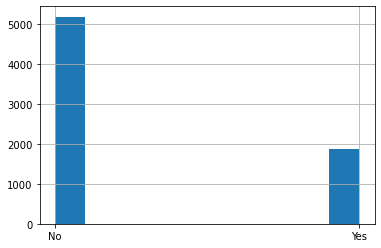

In [6]:
telco_data.churn.hist()

In [7]:
telco_data.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64

## Step 1:
- find number of churned customers, and the percent of churned customers. Comapre to industry average:

In [8]:
telco_churn = telco_data[telco_data.churn == "Yes"].churn.count()
telco_churn

1870

In [9]:
telco_churn_pct = telco_data[telco_data.churn == "Yes"].shape[0]/len(telco_data) ## this is TELCO's churn rate
telco_churn_pct

0.2652858561498085

## Takeaway:
- TELCO's churn rate is 26.53%
- the Telecom (Phone and Internet service) Industry average churn rate for 2022 is 21%
(source: https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/)
- TELCO has a 5.5% higher churn rate than the industry average

In [10]:
churn_total_monthly_charges = telco_data[telco_data.churn == 'Yes'].monthly_charges.sum()
churn_total_monthly_charges

139161.35

## Step 2:
- find the median tenure in months of non-churned customers

In [11]:
stay_tenure = telco_data[telco_data.churn == "No"].tenure.median()
stay_tenure

37.6

## Step 2b:
- median tenure of accounts for churn

In [12]:
churn_tenure = telco_data[telco_data.churn == "Yes"].tenure.median()
churn_tenure

9.7

In [13]:
## median monthly revenue for non-Churn accounts
churn_monthly_mdn_charge = telco_data[telco_data.churn == "Yes"].monthly_charges.median()
churn_monthly_mdn_charge

79.625

In [14]:
stay_monthly_mdn_charge = telco_data[telco_data.churn == "No"].monthly_charges.median()
stay_monthly_mdn_charge

64.4

## Step 3:
- find annual revenue loss per churned customer (12 months - months served on contract by churned customer):

In [15]:
annual_lost_revenue = churn_monthly_mdn_charge * (12 - churn_tenure) 
annual_lost_revenue

183.13750000000005

In [16]:
agg_annual_lost_revenue = annual_lost_revenue * telco_churn ## annual lost revenue per churn * number of churned
agg_annual_lost_revenue

342467.12500000006

## Step 4:
- sum that number to give total churned customers lifetime revenue loss to the company

In [17]:
churn_lifetime_lost_revenue = (stay_tenure - churn_tenure) * churn_monthly_mdn_charge #lifetime loss per customer
churn_lifetime_lost_revenue

2221.5375000000004

In [18]:
agg_churn_lifetime_lost_revenue = churn_lifetime_lost_revenue * telco_churn
agg_churn_lifetime_lost_revenue

4154275.1250000005

## Step 5:
find average acquisition cost per new customer, and multiply by amount of customers required to replace churned customers

- Average Cost of Customer Acquisiton:

    - $315 in 2022 (https://startuptalky.com/cac-by-industry/) 
    
    - replacing 1870 customers, at a cost of $315/ customer: $589,050
    
    - TELCO annual loss of revenue due to churn is: $342,467
    

## Step 6:
Sum both numbers, to give overall lost revenue total. this is the completed problem statement for the company Sales Department

- Annual Total Cost:
    
    - annual churn cost (revenue loss + customer acquisition) = $931,517

## Step 7:
How much does the lost revenue represent in terms of total annual revenue?
- total revenue = avg monthly charges * 12 * count of customers to TELCO = $5,476,820.40

In [19]:
telco_data.monthly_charges.mean() * 12 * telco_data.customer_id.count()

5476820.400000002

In [20]:
931517/5476820.400000002

0.17008353971220228

## Part 1 Takeaways:

- TELCO's annual revenue is $5.5 mn

- Lost revenue due to churn is equivalent to 17% of TELCO's annual revenue, or roughly $930k

- Additionally, lost lifetime revenue from churned customers is >$4 mn.

## Part 2: Get to know your Data at a high level
- Histograms and value counts of our target variable, and variables of interest
- Determine if we have any missing values
    - ** general guideline:
    - if you're doing any ML, split the data before exploring
    - if youre looking at how x and y move together, we need to operate on the `train` dataset
- check your datasource for a Data Dictionary
- check the value counts or a histogram of your target variable
- check for nulls and handle them
- "What do we know about the people who left?"

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


<AxesSubplot:>

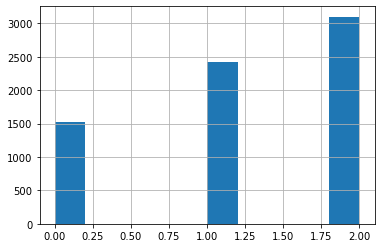

In [23]:
telco_data.internet_service.hist()

<AxesSubplot:xlabel='churn', ylabel='Count'>

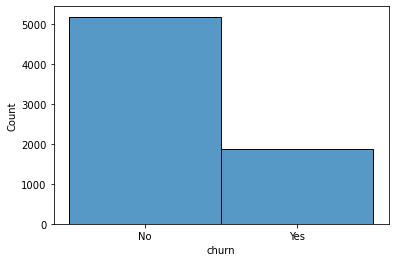

In [24]:
sns.histplot(data = telco_data.churn)

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

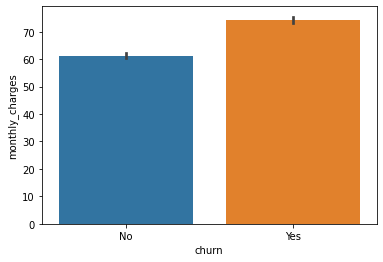

In [25]:
# Is churn dependant higher monthly prices?
sns.barplot(x = "churn", y = "monthly_charges", data = telco_data)

In [26]:
telco_data.sample(25)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
1945,2823-LKABH,Female,0,No,No,2,2,0,Bank transfer (automatic),95.05,1679.40,No,17.7
6027,8532-UEFWH,Male,0,Yes,Yes,2,0,2,Mailed check,25.75,1345.85,No,52.3
2465,3525-DVKFN,Female,0,No,No,1,0,2,Mailed check,19.40,358.05,No,18.5
435,0637-UBJRP,Male,0,Yes,Yes,1,2,0,Electronic check,84.05,1095.30,Yes,13.0
6750,9581-GVBXT,Male,0,Yes,Yes,0,1,1,Mailed check,34.80,1980.30,No,56.9
3450,4891-NLUBA,Female,0,Yes,Yes,0,1,2,Bank transfer (automatic),61.45,3751.15,No,61.0
5746,8084-OIVBS,Female,0,No,No,1,0,1,Mailed check,20.00,211.95,No,10.6
4990,7016-NVRIC,Male,1,Yes,No,1,2,1,Bank transfer (automatic),90.10,2656.70,No,29.5
5324,7520-HQWJU,Female,0,Yes,Yes,2,1,0,Bank transfer (automatic),67.45,4508.65,No,66.8
2609,3720-DBRWL,Male,0,Yes,No,1,1,2,Credit card (automatic),83.85,4307.10,No,51.4


In [27]:
telco_data.customer_id.count()

7049

In [28]:
# Build the variables using pandas
churn = telco_data[telco_data.churn == 'Yes']
kept = telco_data[telco_data.churn == 'No']

## Clean the Data

In [29]:
telco_data.internet_service = telco_data.internet_service.map({0:"No plan", 1:"DSL", 2:"Fiber"})

In [30]:
telco_data.contract_type = telco_data.contract_type.map({0:"Monthly", 1:"1 YR", 2:"2 YR"})
telco_data.phone_service = telco_data.phone_service.map({0:"No phone", 1:"1 line", 2:"2+ lines"})
telco_data.is_senior_citizen = telco_data.is_senior_citizen.map({0:"No", 1:"Yes"})

In [31]:
telco_data.sample(10)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
1800,2632-IVXVF,Female,No,Yes,Yes,2+ lines,Fiber,2 YR,Credit card (automatic),111.75,7511.30,No,67.2
750,1095-JUDTC,Female,Yes,No,No,2+ lines,Fiber,Monthly,Electronic check,95.05,4504.55,Yes,47.4
3659,5171-EPLKN,Male,No,No,No,1 line,No plan,2 YR,Credit card (automatic),19.85,470.00,No,23.7
4679,6599-RCLCJ,Male,No,Yes,No,2+ lines,Fiber,Monthly,Electronic check,109.55,5124.55,Yes,46.8
540,0795-GMVQO,Male,No,Yes,No,2+ lines,Fiber,1 YR,Credit card (automatic),109.90,7332.40,No,66.7
1381,2041-JIJCI,Female,No,No,No,2+ lines,DSL,Monthly,Electronic check,64.00,370.25,No,5.8
854,1240-HCBOH,Female,No,No,No,2+ lines,No plan,2 YR,Mailed check,26.10,1759.55,No,67.4
6443,9122-UMROB,Male,No,No,No,1 line,No plan,Monthly,Mailed check,20.30,20.30,No,1.0
877,1269-FOYWN,Male,No,Yes,Yes,1 line,No plan,1 YR,Bank transfer (automatic),20.00,860.85,No,43.0
6996,9928-BZVLZ,Female,No,No,No,No phone,DSL,2 YR,Mailed check,49.85,552.10,No,11.1


In [32]:
# customers where tenure is less than 6 months, 12 months, 24 months by plan type, by int service,
## "where are customers exiting"

- line chart: tenure in months on the x (continuous variable, dimension), count on the y >> shows where customers are exiting

direct price comparisons: how much does 1 line cost across subscription plans? 2 Lines? 3 Lines?

# Demographics

## 1A: One line, no internet

In [33]:
# the median customer with 1 line, monthly plan, pays:

one_line_monthly_no_int = telco_data.monthly_charges[
    (telco_data.phone_service == "1 line") & (telco_data.contract_type == "Monthly") 
    & (telco_data.internet_service == "No plan")]

In [34]:
print(one_line_monthly_no_int.median()) #Median bill
print(one_line_monthly_no_int.count()) #Count
print(telco_data.monthly_charges[
    (telco_data.phone_service == "1 line") & (telco_data.contract_type == "Monthly") 
    & (telco_data.internet_service == "No plan") & (telco_data.churn == "Yes")
                            ].count()/one_line_monthly_no_int.count()) #Churn Rate

20.0
478
0.19665271966527198


In [35]:
# the median customer with 1 line, 1yr plan, pays:
one_line_yearly_no_int = telco_data.monthly_charges[
    (telco_data.phone_service == "1 line") & (telco_data.contract_type == "1 YR")
    & (telco_data.internet_service == "No plan")]

In [36]:
print(one_line_yearly_no_int.median())
print(one_line_yearly_no_int.count())
print(telco_data.monthly_charges[
    (telco_data.phone_service == "1 line") & (telco_data.contract_type == "1 YR")
    & (telco_data.internet_service == "No plan") & (telco_data.churn == "Yes")
                            ].count()/one_line_yearly_no_int.count()) #Churn Rate

19.95
301
0.023255813953488372


In [37]:
# the median customer with 1 line, 2yr plan, pays:
one_line_two_yearly_no_int = telco_data.monthly_charges[
    (telco_data.phone_service == "1 line") & (telco_data.contract_type == "2 YR")
    & (telco_data.internet_service == "No plan")]

In [38]:
print(one_line_two_yearly_no_int.median())
print(one_line_two_yearly_no_int.count())
print(telco_data.monthly_charges[
    (telco_data.phone_service == "1 line") & (telco_data.contract_type == "2 YR")
    & (telco_data.internet_service == "No plan") & (telco_data.churn == "Yes")
                            ].count()/one_line_two_yearly_no_int.count()) #Churn Rate

19.9
408
0.004901960784313725


## Takeaway from single line, no internet customers:
- HMMM these customers are paying similar rates for single lines, plus the churn rate is super low (19.6, 2, and >1%). Does that change with more lines?

## 1B: Two+ lines, no internet

In [39]:
# the median customer with 2+ lines, monthly plan, pays:

two_line_monthly_no_int = telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "Monthly") 
    & (telco_data.internet_service == "No plan")]

In [40]:
print(two_line_monthly_no_int.median()) #Median bill
print(two_line_monthly_no_int.count()) #Count
print(telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "Monthly") 
    & (telco_data.internet_service == "No plan") & (telco_data.churn == "Yes")
                            ].count()/one_line_monthly_no_int.count()) #Churn Rate

25.025
46
0.010460251046025104


In [41]:
# the median customer with 2+ lines, 1yr plan, pays:
two_line_yearly_no_int = telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "1 YR")
    & (telco_data.internet_service == "No plan")]

In [42]:
print(two_line_yearly_no_int.median())
print(two_line_yearly_no_int.count())
print(telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "1 YR") 
    & (telco_data.internet_service == "No plan") & (telco_data.churn == "Yes")
                            ].count()/two_line_monthly_no_int.count()) #Churn Rate

24.8
64
0.043478260869565216


In [43]:
# the median customer with 2+ lines, 1yr plan, pays:
two_line_two_yearly_no_int = telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "2 YR")
    & (telco_data.internet_service == "No plan")]

In [44]:
print(two_line_two_yearly_no_int.median())
print(two_line_two_yearly_no_int.count())
print(telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "2 YR") 
    & (telco_data.internet_service == "No plan") & (telco_data.churn == "Yes")
                            ].count()/two_line_monthly_no_int.count()) #Churn Rate

25.025
232
0.06521739130434782


## Takeaway from Two+ lines, no internet customers:
- These customers are also paying similar rates for single lines. oddly, the two-yearly customers are paying the same rates as the monthly customers, while the one-yearly rate is lowest. The churn rate is remains lower or significantly lowr than then industry average of 21% (1, 4, and 7%). 

# NEXT QUESTION: Does that change with internet?

## 1A: One line, DSL

In [45]:
# the median customer with 1 line, DSL,  monthly plan, pays:

one_line_monthly_dsl = telco_data.monthly_charges[
    (telco_data.phone_service == "1 line") & (telco_data.contract_type == "Monthly") 
    & (telco_data.internet_service == "DSL")]

In [46]:
print(one_line_monthly_dsl.median()) #Median bill
print(one_line_monthly_dsl.count()) #Count
print(telco_data.monthly_charges[
    (telco_data.phone_service == "1 line") & (telco_data.contract_type == "Monthly") 
    & (telco_data.internet_service == "DSL") & (telco_data.churn == "Yes")
                            ].count()/one_line_monthly_dsl.count()) #Churn Rate

51.3
628
0.30254777070063693


In [47]:
# the median customer with 1 line, DSL, 1yr plan, pays:
one_line_yearly_dsl = telco_data.monthly_charges[
    (telco_data.phone_service == "1 line") & (telco_data.contract_type == "1 YR")
    & (telco_data.internet_service == "DSL")]

In [48]:
print(one_line_yearly_dsl.median())
print(one_line_yearly_dsl.count())
print(telco_data.monthly_charges[
    (telco_data.phone_service == "1 line") & (telco_data.contract_type == "1 YR")
    & (telco_data.internet_service == "DSL") & (telco_data.churn == "Yes")
                            ].count()/one_line_yearly_dsl.count()) #Churn Rate

61.35
243
0.09053497942386832


In [49]:
# the median customer with 1 line, 2yr plan, pays:
one_line_two_yearly_dsl = telco_data.monthly_charges[
    (telco_data.phone_service == "1 line") & (telco_data.contract_type == "2 YR")
    & (telco_data.internet_service == "DSL")]

In [50]:
print(one_line_two_yearly_dsl.median())
print(one_line_two_yearly_dsl.count())
print(telco_data.monthly_charges[
    (telco_data.phone_service == "1 line") & (telco_data.contract_type == "2 YR")
    & (telco_data.internet_service == "DSL") & (telco_data.churn == "Yes")
                            ].count()/one_line_two_yearly_dsl.count()) #Churn Rate

73.35
177
0.022598870056497175


## Takeaway from single line, DSL customers:
- Interesting: high churn rate for monthly customers with one phone line and DSL: 30.3% ==> this populaiton should be investigated further.

## 2B: Two+ lines, DSL

In [51]:
# the median customer with 2+ lines, monthly plan, pays:

two_line_monthly_no_int = telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "Monthly") 
    & (telco_data.internet_service == "No plan")]

In [52]:
print(two_line_monthly_no_int.median()) #Median bill
print(two_line_monthly_no_int.count()) #Count
print(telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "Monthly") 
    & (telco_data.internet_service == "No plan") & (telco_data.churn == "Yes")
                            ].count()/one_line_monthly_no_int.count()) #Churn Rate

25.025
46
0.010460251046025104


In [53]:
# the median customer with 2+ lines, 1yr plan, pays:
two_line_yearly_no_int = telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "1 YR")
    & (telco_data.internet_service == "No plan")]

In [54]:
print(two_line_yearly_no_int.median())
print(two_line_yearly_no_int.count())
print(telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "1 YR") 
    & (telco_data.internet_service == "No plan") & (telco_data.churn == "Yes")
                            ].count()/two_line_monthly_no_int.count()) #Churn Rate

24.8
64
0.043478260869565216


In [55]:
# the median customer with 2+ lines, 1yr plan, pays:
two_line_two_yearly_no_int = telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "2 YR")
    & (telco_data.internet_service == "No plan")]

In [56]:
print(two_line_two_yearly_no_int.median())
print(two_line_two_yearly_no_int.count())
print(telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "2 YR") 
    & (telco_data.internet_service == "No plan") & (telco_data.churn == "Yes")
                            ].count()/two_line_monthly_no_int.count()) #Churn Rate

25.025
232
0.06521739130434782


## Takeaway from Two+ lines, internet customers:
- These customers are also paying similar rates for single lines. oddly, the two-yearly customers are paying the same rates as the monthly customers, while the one-yearly rate is lowest. The churn rate is remains lower or significantly lowr than then industry average of 21% (1, 4, and 7%). Does that change with internet?

In [57]:
# the median customer with 2+ lines, monthly plan, pays:
print(telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "Monthly") 
    & (telco_data.internet_service == "No plan")
                            ].median())
print(telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "Monthly") 
    & (telco_data.internet_service == "No plan")
                            ].count())

25.025
46


In [58]:
# the median customer with 2+ lines, 1yr plan, pays:
print(telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "1 YR")
    & (telco_data.internet_service == "No plan")
                            ].median())

print(telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "1 YR")
    & (telco_data.internet_service == "No plan")
                            ].count())

24.8
64


In [59]:
# the median customer with 2+ line, 2yr plan, pays:
print(telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "2 YR")
    & (telco_data.internet_service == "No plan")
                            ].median())

print(telco_data.monthly_charges[
    (telco_data.phone_service == "2+ lines") & (telco_data.contract_type == "2 YR")
    & (telco_data.internet_service == "No plan")
                            ].count())

25.025
232


do people with dependants have more lines? if not - that's an adressable market

does it pay to bundle with internet?

what is the price of dsl internet and one line? are we incentivizing switiching to fiber? and bundling lines?

what consumer is most likely to churn? what are they consuming? how can we incentivize them to stay (price cut for the plan)

In [60]:
how are churning consumers paying their bills? how do we incentivize a switch to autopay/yearly plans?

Object `plans` not found.


In [ ]:
how are churning consumers paying their bills? how do we incentivize a switch to autopay/yearly plans

In [61]:
how are churning consumers paying their bills? how do we incentivize a switch to autopay/yearly plans

SyntaxError: invalid syntax (645378806.py, line 1)

## Export
#telco_data.to_csv('//Users/frederik.lindsey/Home/codeup-data-science/storytelling_with_data/first_export.csv')

In [ ]:
## Graph and Visualization ideas
- tenure on the y
- monthly v yearly v 2 yearly (phone only, phone + DSL, phone + fiber)

<AxesSubplot:xlabel='contract_type', ylabel='tenure'>

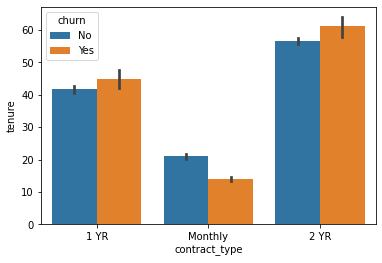

In [65]:
sns.barplot(data = telco_data,
            y = 'tenure',
            x = 'contract_type',
            hue = 'churn')